In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("/content/zomato.csv",encoding='latin-1')
print(df)

      Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730              NamlÛ± Gurme           208         ÛÁstanbul   
9547        5908749             Ceviz AÛôacÛ±           208         ÛÁstanbul   
9548        5915807                     Huqqa           208         ÛÁstanbul   
9549        5916112              Aôôk Kahve           208         ÛÁstanbul   
9550        5927402  Walter's Coffee Roastery           208         ÛÁstanbul   

                           

In [5]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [6]:
country_codes = pd.read_excel('/content/Country-Code.xlsx')
country_codes.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [7]:
data = pd.merge(df,country_codes,how='left',on='Country Code')
data.drop(['Country Code','Address','Locality','Locality Verbose','Longitude', 'Latitude'],axis=1,inplace=True)
data.head()
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   City                  9551 non-null   object 
 3   Cuisines              9542 non-null   object 
 4   Average Cost for two  9551 non-null   int64  
 5   Currency              9551 non-null   object 
 6   Has Table booking     9551 non-null   object 
 7   Has Online delivery   9551 non-null   object 
 8   Is delivering now     9551 non-null   object 
 9   Switch to order menu  9551 non-null   object 
 10  Price range           9551 non-null   int64  
 11  Aggregate rating      9551 non-null   float64
 12  Rating color          9551 non-null   object 
 13  Rating text           9551 non-null   object 
 14  Votes                 9551 non-null   int64  
 15  Country              

In [8]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [9]:
df.describe(include='object')

,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text
count,9551,9551,9551,9551,9551,9542,9551,9551,9551,9551,9551,9551,9551
unique,7446,141,8918,1208,1265,1825,12,2,2,2,1,6,6
top,Cafe Coffee Day,New Delhi,"Dilli Haat, INA, New Delhi",Connaught Place,"Connaught Place, New Delhi",North Indian,Indian Rupees(Rs.),No,No,No,No,Orange,Average
freq,83,5473,11,122,122,936,8652,8393,7100,9517,9551,3737,3737


In [10]:
for col in data.describe(include='object').columns:
    print(col)
    print(data[col].unique())
    print('-'*50)

Restaurant Name
['Le Petit Souffle' 'Izakaya Kikufuji' 'Heat - Edsa Shangri-La' ...
 'Huqqa' 'A\x81ô\x81ôk Kahve' "Walter's Coffee Roastery"]
--------------------------------------------------
City
['Makati City' 'Mandaluyong City' 'Pasay City' 'Pasig City' 'Quezon City'
 'San Juan City' 'Santa Rosa' 'Tagaytay City' 'Taguig City' 'Brasí_lia'
 'Rio de Janeiro' 'Sí£o Paulo' 'Albany' 'Armidale' 'Athens' 'Augusta'
 'Balingup' 'Beechworth' 'Boise' 'Cedar Rapids/Iowa City' 'Chatham-Kent'
 'Clatskanie' 'Cochrane' 'Columbus' 'Consort' 'Dalton' 'Davenport'
 'Des Moines' 'Dicky Beach' 'Dubuque' 'East Ballina' 'Fernley' 'Flaxton'
 'Forrest' 'Gainesville' 'Hepburn Springs' 'Huskisson' 'Inverloch'
 'Lakes Entrance' 'Lakeview' 'Lincoln' 'Lorn' 'Macedon' 'Macon' 'Mayfield'
 'Mc Millan' 'Middleton Beach' 'Miller' 'Monroe' 'Montville'
 'Ojo Caliente' 'Orlando' 'Palm Cove' 'Paynesville' 'Penola' 'Pensacola'
 'Phillip Island' 'Pocatello' 'Potrero' 'Princeton' 'Rest of Hawaii'
 'Savannah' 'Singapore' 'Sio

In [11]:
df.shape

(9551, 21)

In [12]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [13]:
df['Cuisines'].dropna(axis=0,inplace=True)

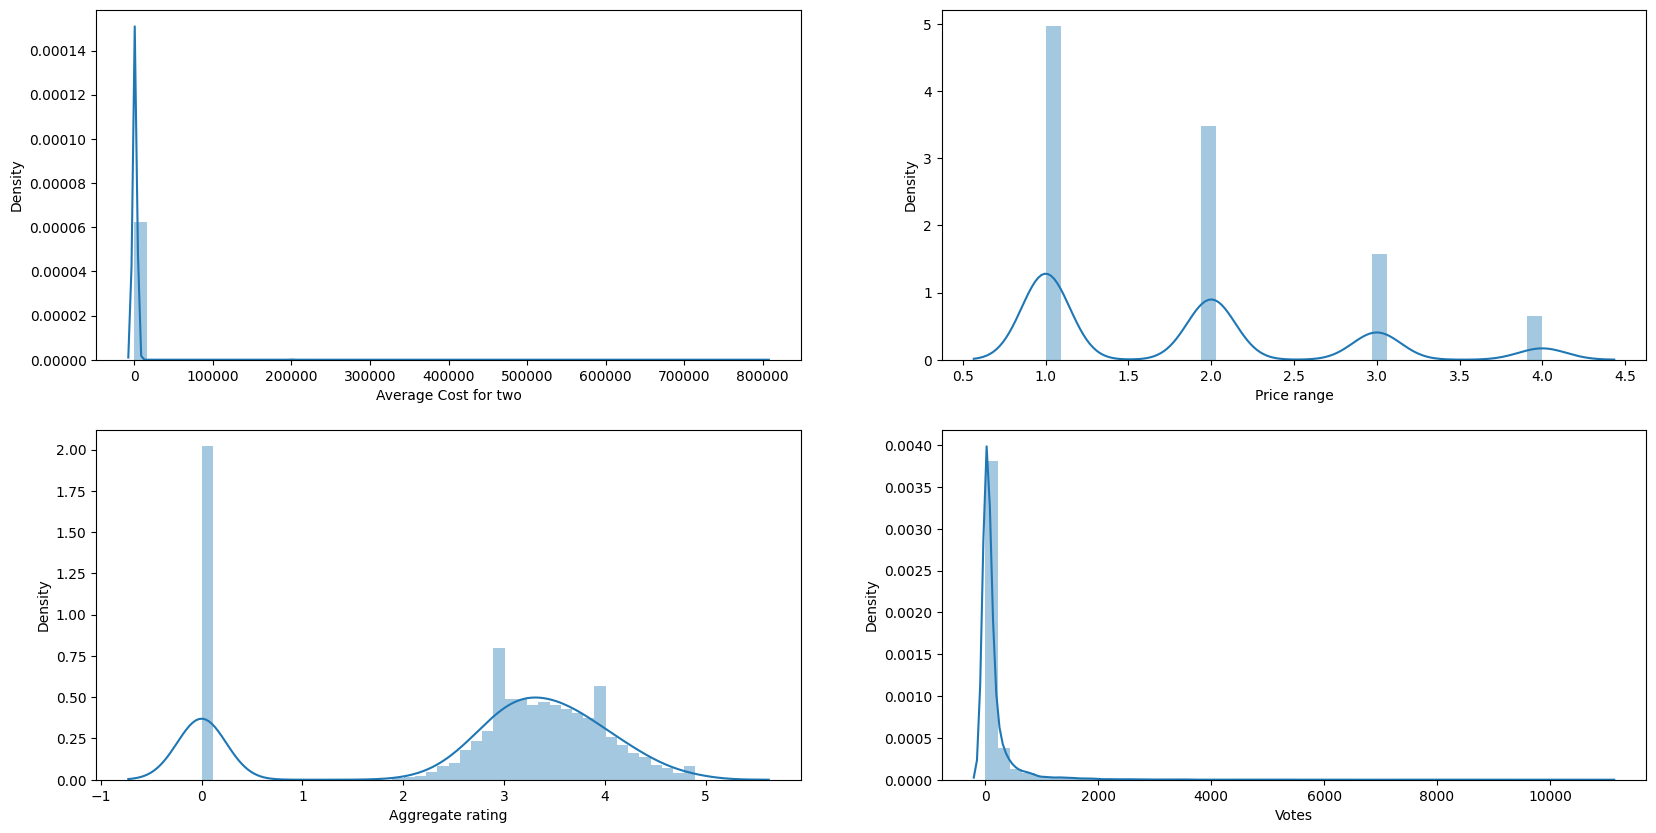

In [14]:
labels = list(data.describe().columns)[1:]
c=0
plt.figure(figsize=(20,10))
for i in labels:
    c=c+1
    plt.subplot(2,2,c)
    sns.distplot(df[i],kde=True,)

plt.show()

In [15]:
#z-score analysis to remove outliers
import scipy.stats as st

In [16]:
continous_df = df[list(data.describe().columns)[1:]]
z = np.abs(st.zscore(continous_df))
continous_df = continous_df[(z<3).all(axis=1)]
continous_df.shape

(9362, 4)

In [17]:
clean_data = data.iloc[continous_df.index]
clean_data.head()

,Restaurant ID,Restaurant Name,City,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,Makati City,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,Makati City,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,Mandaluyong City,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,Mandaluyong City,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [18]:
country_counts = clean_data['Country'].value_counts()

In [19]:
def get_cuisines(clean_data,country):

    df = clean_data[clean_data['Country']==country]
    top_10 = df['Cuisines'].value_counts().nlargest(10)
    total = len(df)
    cuisine_type = np.array(top_10.keys())
    cuisine_count = np.array(top_10.values)

    cuisine_count = (cuisine_count/total)*100
    cuisine_count = np.round(cuisine_count,decimals=2)


    fig = plt.figure(figsize=(12,8))
    plt.title(f'%DISTRIBUTION OF TOP 10 CUISINES IN {country.upper()}')
    plt.xlabel('Cuisines')
    plt.ylabel('% Count')
    plt.xticks(rotation=90)
    ax = sns.barplot(x=cuisine_type,y=cuisine_count)
    #ax = sns.countplot(x='Cuisines',data=df,order=top_10.index)
    ax.bar_label(ax.containers[0])
    plt.show()

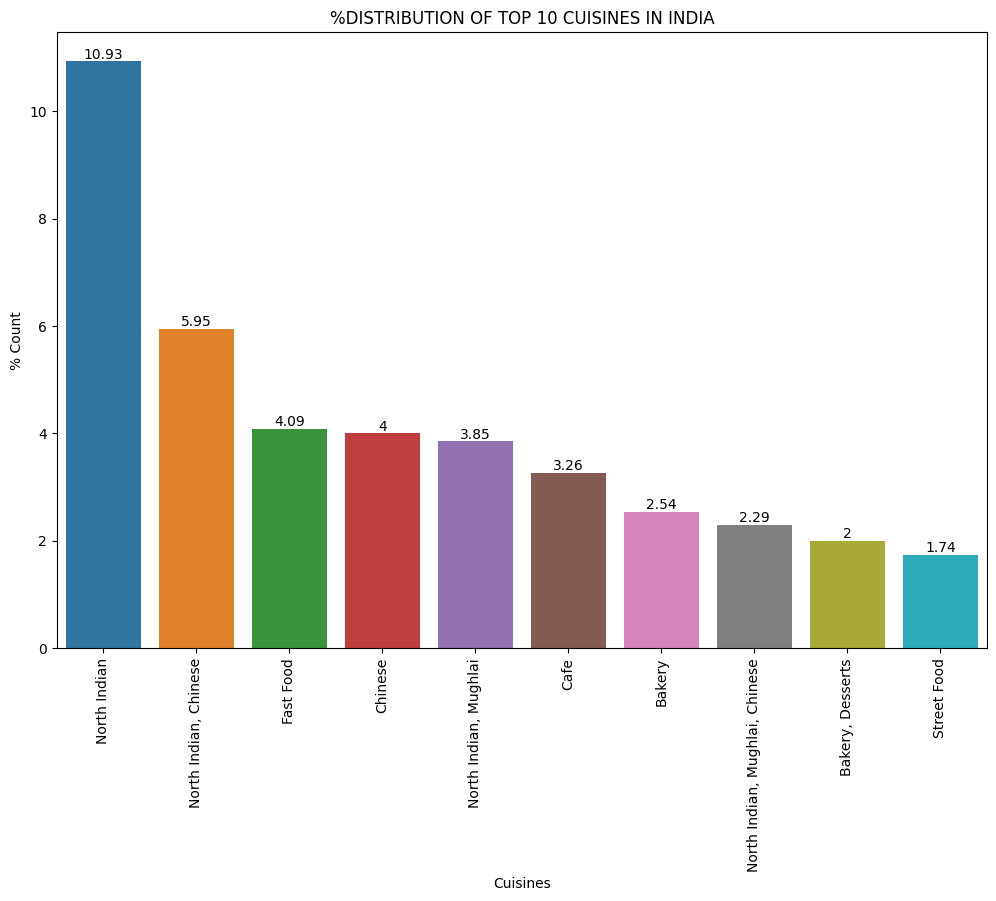

In [20]:
get_cuisines(clean_data,'India')

<Axes: >

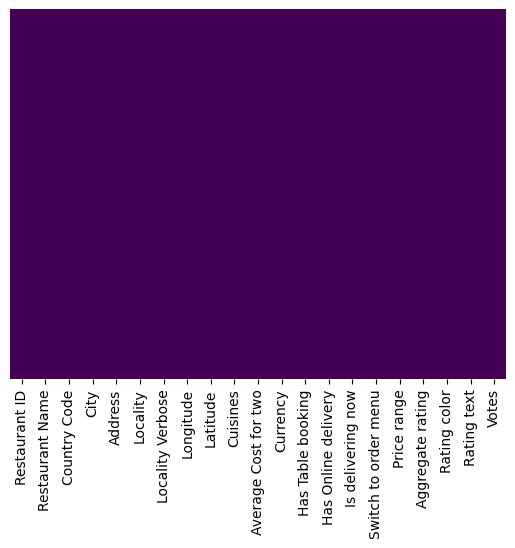

In [21]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [22]:
final_df=pd.merge(df,country_codes,on='Country Code', how='left')
final_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


([<matplotlib.patches.Wedge at 0x7f174d3e3c70>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

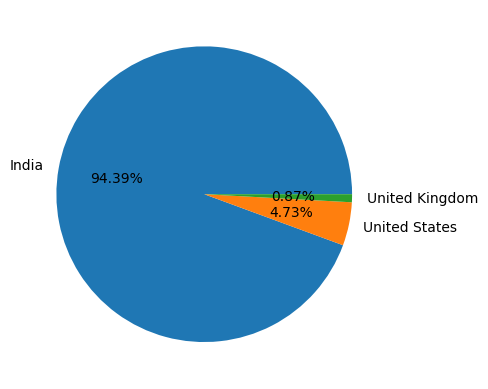

In [23]:
country_names=final_df.Country.value_counts().index
final_df.columns
country_val=final_df.Country.value_counts().values
# Pie Chart- Top 3 countries that uses zomato
plt.pie(country_val[:3],labels=country_names[:3],autopct='%1.2f%%')

In [24]:

ratings=final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename
ratings


<bound method DataFrame.rename of     Aggregate rating Rating color Rating text     0
0                0.0        White   Not rated  2148
1                1.8          Red        Poor     1
2                1.9          Red        Poor     2
3                2.0          Red        Poor     7
4                2.1          Red        Poor    15
5                2.2          Red        Poor    27
6                2.3          Red        Poor    47
7                2.4          Red        Poor    87
8                2.5       Orange     Average   110
9                2.6       Orange     Average   191
10               2.7       Orange     Average   250
11               2.8       Orange     Average   315
12               2.9       Orange     Average   381
13               3.0       Orange     Average   468
14               3.1       Orange     Average   519
15               3.2       Orange     Average   522
16               3.3       Orange     Average   483
17               3.4       Ora

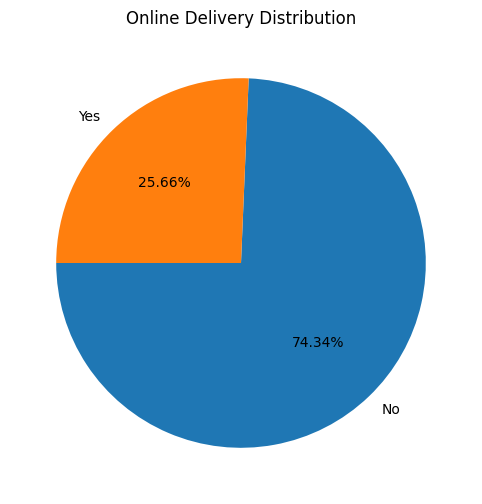

In [49]:
plt.figure(figsize=(12,6))
plt.title('Online Delivery Distribution')
plt.pie(df['Has Online delivery'].value_counts()/9551*100, labels=df['Has Online delivery'].value_counts().index, autopct='%1.2f%%', startangle=180);

In [25]:
final_df.columns
final_df[final_df['Has Online delivery'] =="Yes"].Country.value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

In [27]:
final_df[final_df['Has Online delivery'] =="Yes"].Country.value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

In [29]:
final_df.City.value_counts().index

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad',
       'Bhubaneshwar', 'Amritsar', 'Ahmedabad', 'Lucknow', 'Guwahati',
       ...
       'Ojo Caliente', 'Montville', 'Monroe', 'Miller', 'Middleton Beach',
       'Panchkula', 'Mc Millan', 'Mayfield', 'Macedon', 'Vineland Station'],
      dtype='object', length=141)

In [30]:
city_values=final_df.City.value_counts().values
city_labels=final_df.City.value_counts().index

([<matplotlib.patches.Wedge at 0x7f174d1d62c0>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

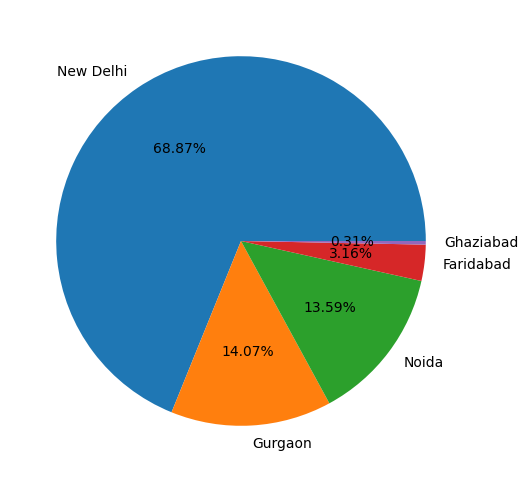

In [31]:
plt.pie(city_values[:5],labels=city_labels[:5],autopct='%1.2f%%')

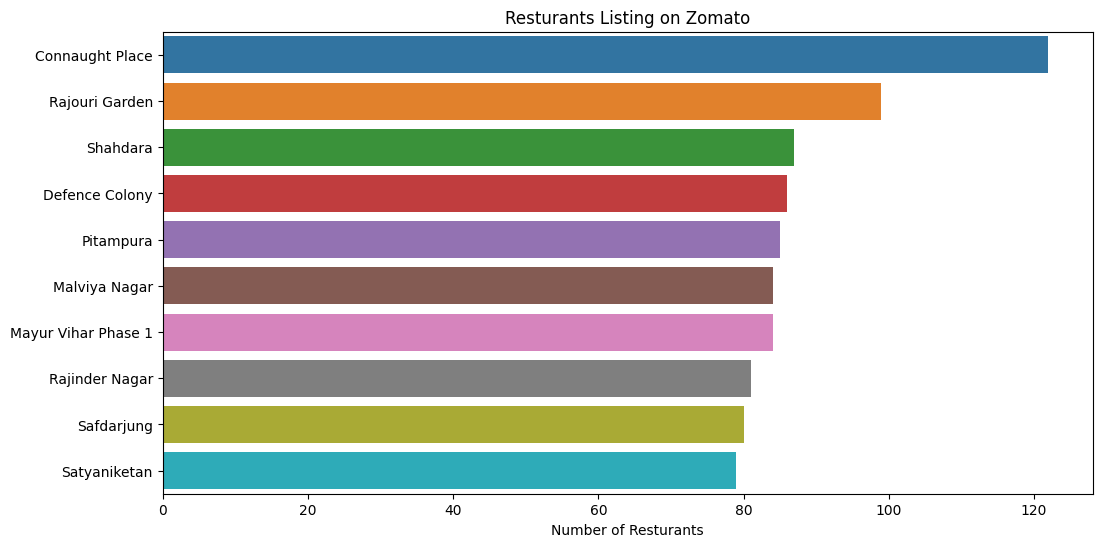

In [36]:
#maximum hotels from locality
Delhi = df[(df.City == 'New Delhi')]
plt.figure(figsize=(12,6))
sns.barplot(x=Delhi.Locality.value_counts().head(10), y=Delhi.Locality.value_counts().head(10).index)

plt.ylabel(None);
plt.xlabel('Number of Resturants')
plt.title('Resturants Listing on Zomato');

In [38]:
##Cuisine these highly rates restaurants offer
ConnaughtPlace = Delhi[(Delhi.Locality.isin(['Connaught Place'])) & (Delhi['Rating text'].isin(['Excellent','Very Good']))]

ConnaughtPlace = ConnaughtPlace.Cuisines.value_counts().reset_index()

## Extracing all the cuisens in a single list
cuisien = []
for x in ConnaughtPlace['index']:
  cuisien.append(x)

# cuisien = '[%s]'%', '.join(map(str, cuisien))
cuisien

['North Indian, Chinese, Italian, Continental',
 'Continental, Italian, Asian, Indian',
 'Continental, Mediterranean, Italian, North Indian',
 'Bakery, Desserts, Fast Food',
 'North Indian, Continental',
 'North Indian, European, Asian, Mediterranean',
 'Continental, North Indian, Italian, Asian',
 'North Indian, Afghani, Mughlai',
 'North Indian, European',
 'Cafe',
 'Continental, Mexican, Burger, American, Pizza, Tex-Mex',
 'South Indian',
 'Asian, North Indian',
 'Italian, Mexican, Continental, North Indian, Finger Food',
 'Continental, American, Asian, North Indian',
 'Fast Food, American, Burger',
 'North Indian, Mediterranean, Asian, Fast Food',
 'Ice Cream',
 'Healthy Food, Continental, Italian',
 'Japanese',
 'Modern Indian',
 'Chinese',
 'Continental, North Indian, Chinese, Mediterranean',
 'North Indian, Chinese, Italian, American, Middle Eastern',
 'Biryani, Hyderabadi',
 'Biryani, North Indian, Hyderabadi',
 'North Indian, Chinese',
 'North Indian, Chinese, Continental, Ita

In [39]:
df3 = df.groupby(['Aggregate rating','Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
df3
df3

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


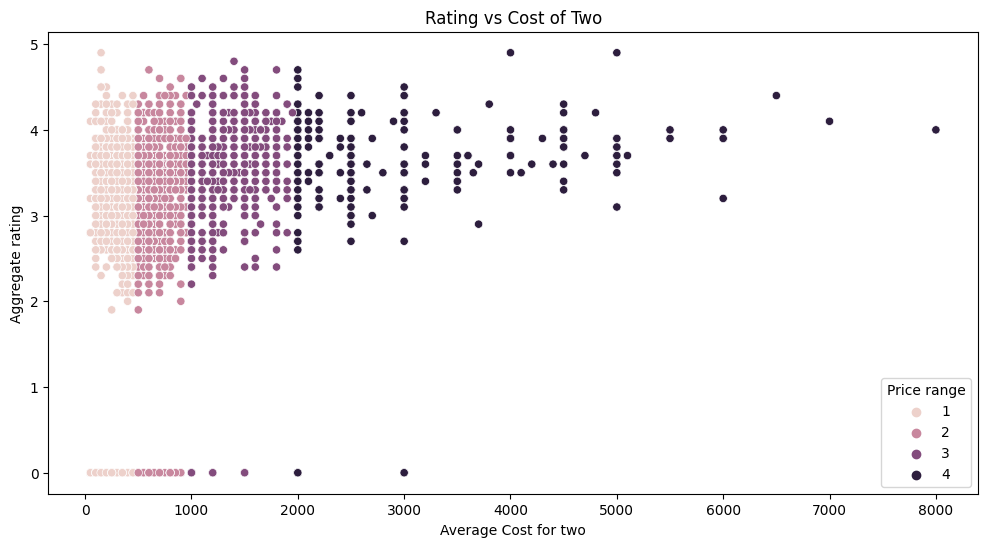

In [37]:
#Rating vs cost of dining
plt.figure(figsize=(12,6))
sns.scatterplot(x="Average Cost for two", y="Aggregate rating", hue='Price range', data=Delhi)

plt.xlabel("Average Cost for two")
plt.ylabel("Aggregate rating")
plt.title('Rating vs Cost of Two');

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [46]:
#SVM
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X = df[['Price range',"Aggregate rating"]]
y = df['Votes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion}")
print(f"Classification Report:\n{report}")

Accuracy: 0.13553113553113552
Confusion Matrix:
[[218   0   0 ...   0   0   0]
 [ 91   0   0 ...   0   0   0]
 [ 71   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.52      1.00      0.68       218
           1       0.00      0.00      0.00        91
           2       0.00      0.00      0.00        71
           3       0.00      0.00      0.00        41
           4       0.08      0.97      0.15        40
           5       0.01      0.03      0.02        32
           6       0.00      0.00      0.00        30
           7       0.00      0.00      0.00        31
           8       0.00      0.00      0.00        21
           9       0.00      0.00      0.00        32
          10       0.00      0.00      0.00        27
          11       0.00      0.00      0.00        23
          12       0.00      0.00 

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X = df[['Price range',"Aggregate rating"]]
y = df['Votes']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train the Decision Tree model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_pred_encoded = decision_tree_model.predict(X_test)
y_pred = label_encoder.inverse_transform(y_pred_encoded)
accuracy = accuracy_score(y_test, y_pred_encoded)
confusion = confusion_matrix(y_test, y_pred_encoded)
report = classification_report(y_test, y_pred_encoded)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion}")
print(f"Classification Report:\n{report}")


Accuracy: 0.14076399790685504
Confusion Matrix:
[[215   0   0 ...   0   0   0]
 [ 91   0   0 ...   0   0   0]
 [ 71   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.99      0.68       218
           1       0.00      0.00      0.00        91
           2       0.00      0.00      0.00        71
           3       0.00      0.00      0.00        41
           4       0.18      0.75      0.29        40
           5       0.02      0.03      0.02        32
           6       0.08      0.17      0.11        30
           7       0.04      0.10      0.06        31
           8       0.09      0.19      0.12        21
           9       0.00      0.00      0.00        32
          10       0.03      0.07      0.04        27
          11       0.08      0.13      0.10        23
          12       0.00      0.00 